In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4.0,NaN,1.0,3.0,NaN,NaN,3.0,NaN,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	16
float64		column 2	32
float64		column 3	130
float64		column 4	66
float64		column 5	114
float64		column 6	64
float64		column 7	96
float64		column 8	66
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,667.000000,651.000000,553.000000,617.000000,569.000000,619.000000,587.000000,617.000000,683.000000
mean,4.427286,3.129032,3.043400,2.763371,3.172232,3.462036,3.364566,2.769854,1.603221
std,2.812783,3.067738,2.878883,2.813307,2.204797,3.587523,2.375926,2.973727,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,4.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

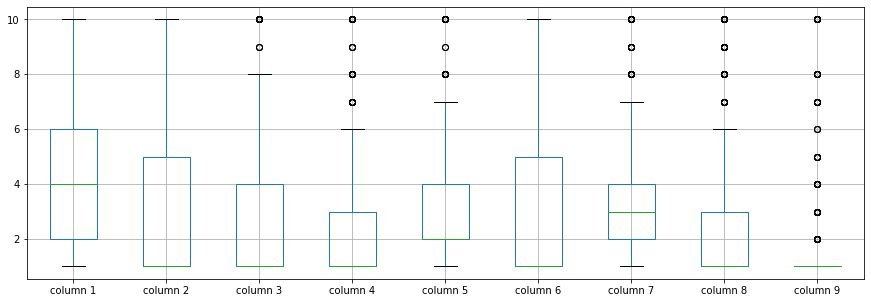

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.427286
column 2    3.129032
column 3    3.043400
column 4    2.763371
column 5    3.172232
column 6    3.462036
column 7    3.364566
column 8    2.769854
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.639596,0.645444,0.465121,0.502562,0.572803,0.522145,0.525875,0.346090
column 2,0.639596,1.000000,0.905591,0.708342,0.741974,0.686305,0.734400,0.716310,0.457588
column 3,0.645444,0.905591,1.000000,0.673895,0.717946,0.698553,0.718151,0.693634,0.452636
column 4,0.465121,0.708342,0.673895,1.000000,0.602219,0.643098,0.645591,0.578866,0.411094
column 5,0.502562,0.741974,0.717946,0.602219,1.000000,0.566711,0.604070,0.612571,0.504504
column 6,0.572803,0.686305,0.698553,0.643098,0.566711,1.000000,0.647753,0.561409,0.320587
column 7,0.522145,0.734400,0.718151,0.645591,0.604070,0.647753,1.000000,0.633578,0.331374
column 8,0.525875,0.716310,0.693634,0.578866,0.612571,0.561409,0.633578,1.000000,0.414637
column 9,0.346090,0.457588,0.452636,0.411094,0.504504,0.320587,0.331374,0.414637,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+54,9+54+54,9+54+54,9+54+54+54+54,9+54+54+54,9+54+54,9+54,9], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 32.63726475125267
Epoch: 1 , loss: 32.7730845496768
Epoch: 2 , loss: 32.451920327686125
Epoch: 3 , loss: 32.270774409884496
Epoch: 4 , loss: 31.084197861807688
Epoch: 5 , loss: 28.124451137724378
Epoch: 6 , loss: 27.203159740992955
Epoch: 7 , loss: 27.23798906235468
Epoch: 8 , loss: 26.830575261797225
Epoch: 9 , loss: 25.80715660821824
Epoch: 10 , loss: 25.803834915161133
Epoch: 11 , loss: 25.037844930376327
Epoch: 12 , loss: 24.74531098774501
Epoch: 13 , loss: 24.737806093125116
Epoch: 14 , loss: 24.210198129926408
Epoch: 15 , loss: 24.05210277012416
Epoch: 16 , loss: 23.034782500494096
Epoch: 17 , loss: 23.279995191664923
Epoch: 18 , loss: 23.274023964291526
Epoch: 19 , loss: 22.634355159032914
Epoch: 20 , loss: 22.85988512493315
Epoch: 21 , loss: 21.636495136079333
Epoch: 22 , loss: 22.073967956361315
Epoch: 23 , loss: 22.03430241630191
Epoch: 24 , loss: 21.43044780549549
Epoch: 25 , loss: 21.6757098

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0
1,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0
2,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0
3,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0
4,0.0,1.069327,0.0,0.0,0.017779,1.19775,0.0,0.786077,0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0
679,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0
680,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0
681,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(80.05845828202341, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.23874657393154136

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.000000,1.0,1.0,2.000000,1.00000,3.0,1.000000,1
1,5.0,4.000000,4.0,5.0,7.000000,10.00000,3.0,2.000000,1
2,3.0,1.000000,1.0,1.0,2.000000,2.00000,3.0,1.000000,1
3,6.0,8.000000,8.0,1.0,3.000000,4.00000,3.0,7.000000,1
4,4.0,2.069327,1.0,3.0,2.017779,2.19775,3.0,1.786077,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.000000,1.0,1.0,2.000000,1.00000,2.0,1.000000,1
679,2.0,1.000000,1.0,1.0,2.000000,1.00000,3.0,1.000000,1
680,5.0,10.000000,10.0,10.0,4.000000,10.00000,5.0,6.000000,3
681,1.0,1.000000,1.0,3.0,2.000000,1.00000,1.0,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AN_10(imp).xlsx", index=False, header=False)